<a href="https://colab.research.google.com/github/Nuelky/Finance/blob/main/ML_GWP1_8530_MScFE632_Machine_Learning_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MScFE 632 ML GWP1  M1, group number 8530** #

---
#**STEP 1**

Team Member C: CATEGORY 3 (PRINCIPAL COMPONENT)

Team Member B: CATEGORY 2 (k-means clustering)

Team Member A: CATEGORY 1 (Elastic Net)

#**STEP 2**:

### Principal Components Analysis (PCA)
#### Advantages:

Principal Components Analysis (PCA) offers several benefits when analyzing high-dimensional data, which include:

1) Dimensionality Reduction:
PCA is extensively employed as an initial step in regression analysis due to its capability to reduce data dimensionality. It linearly converts datasets with many features into fewer components (principal components, PCs) that retain the majority of the original data's information. This approach is very helpful when handling datasets that are characterized by numerous variables.

2) Feature Extraction:
PCA identifies and extracts the most important features within a dataset, which helps in facilitating a clearer and more concise representation. These extracted features are presented as linear combinations of the original variables, and their relevance can be assessed based on their individual contribution to the total data variance.

3) Addressing Multicollinearity:
PCA effectively mitigates multicollinearity by transforming correlated variables into orthogonal (uncorrelated) principal components. As a result, the issue of correlated features inherent in the original dataset is resolved, thereby enabling more reliable analysis.

4) Enhanced Model Performance:
Applying PCA prior to running machine learning algorithms can often enhance their predictive accuracy. This improvement arises because PCA reduces the risk of overfitting and minimizes the adverse effects associated with the curse of dimensionality, resulting in more generalized and robust models.

5) Noise Reduction:
PCA assists in diminishing the effect of noise and irrelevant information in datasets. By focusing analysis and visualization on principal components that account for the largest variance, PCA helps ensure that essential patterns and relationships are captured, thereby enhancing overall data quality.


#### COMPUTATION

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


Data shape: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


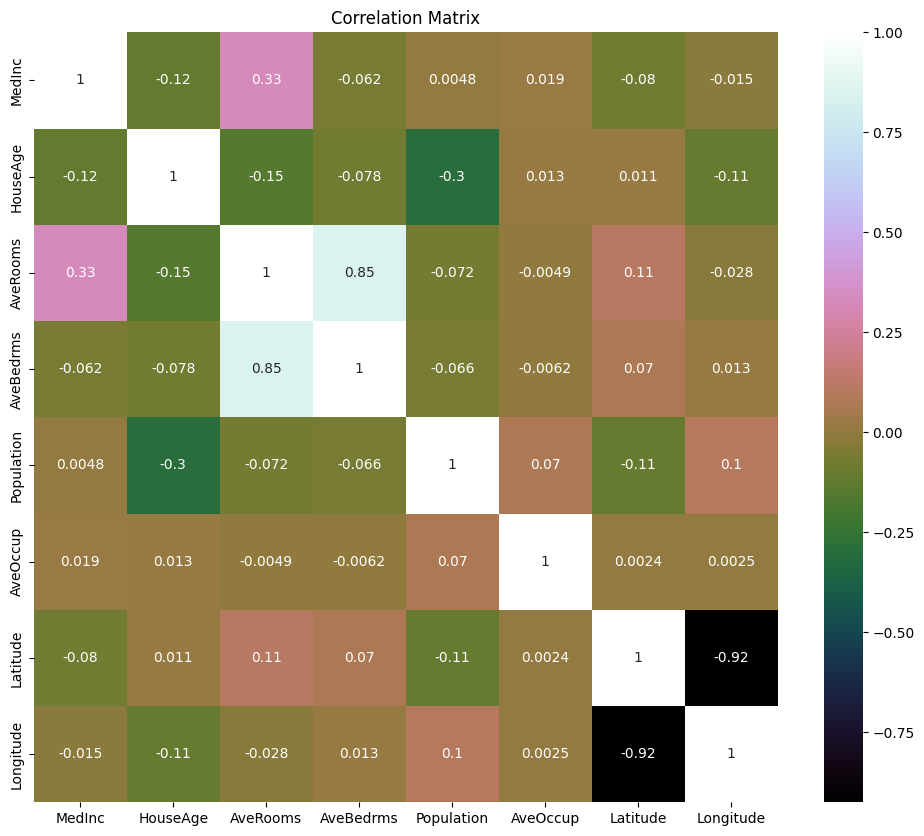

Explained Variance Ratio: [0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]
Cumulative Explained Variance: [0.25336868 0.48853113 0.64741747 0.77629718 0.90167913 0.98410164
 0.99430186 1.        ]


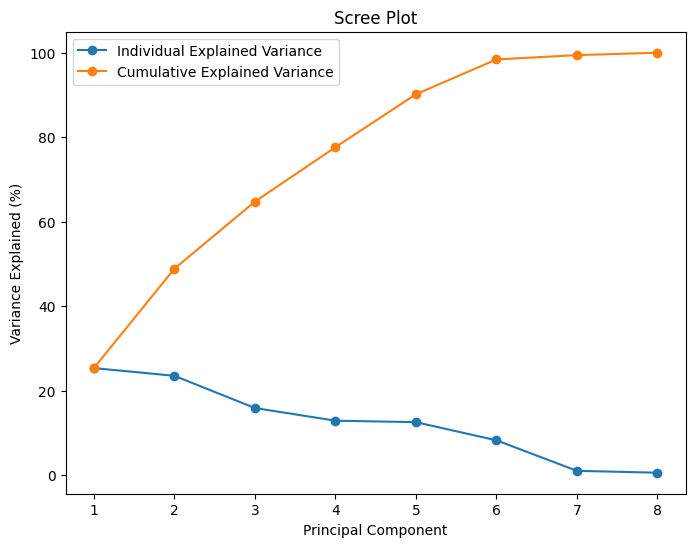

Factor Loadings:
                  PC1       PC2       PC3       PC4       PC5       PC6  \
MedInc      0.077462  0.229879  0.218222  0.885294 -0.002603  0.149818   
HouseAge    0.007318 -0.260786 -0.627551  0.109898  0.222936  0.683931   
AveRooms    0.439142  0.546687 -0.063999  0.046402  0.029852  0.095054   
AveBedrms   0.399996  0.501850 -0.191848 -0.338144  0.050922  0.086854   
Population -0.171783  0.100626  0.650375 -0.283207  0.008078  0.675226   
AveOccup   -0.014644  0.002621  0.157727 -0.004918  0.972669 -0.169410   
Latitude    0.568364 -0.374011  0.192600 -0.062214 -0.022761 -0.042069   
Longitude  -0.536974  0.422387 -0.180824 -0.059846  0.011807 -0.082551   

                 PC7       PC8  
MedInc      0.169238  0.242271  
HouseAge   -0.081035  0.044846  
AveRooms   -0.530662 -0.458814  
AveBedrms   0.531566  0.379875  
Population -0.031676  0.013170  
AveOccup    0.003246 -0.008959  
Latitude   -0.431797  0.554415  
Longitude  -0.461698  0.526165  


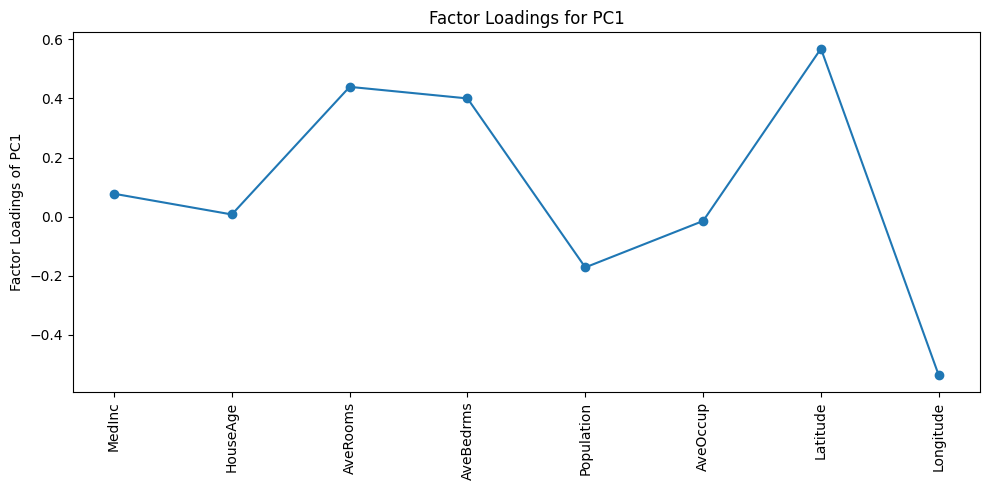

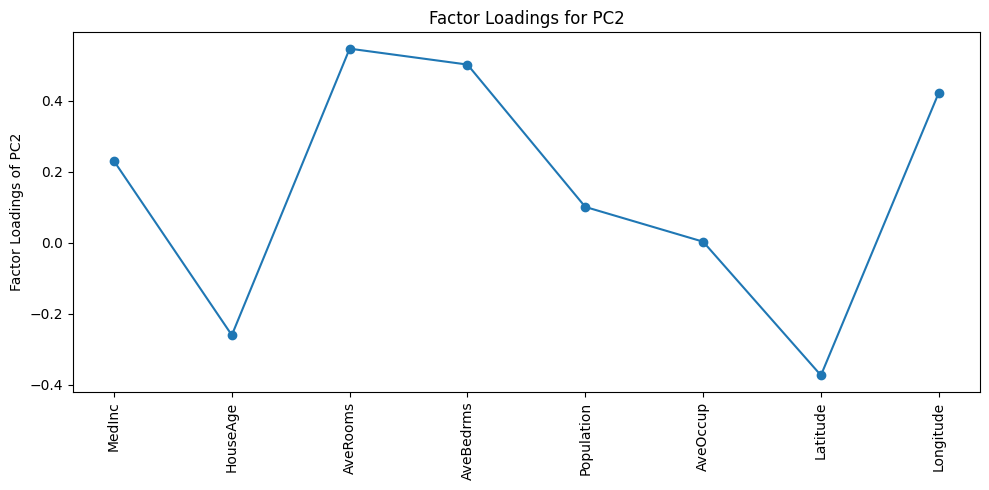

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the California housing dataset (as a DataFrame).
cal_housing = fetch_california_housing(as_frame=True)
housing = cal_housing.frame
print("Data shape:", housing.shape)
print("Columns:", housing.columns.tolist())

# In this dataset, the target variable is 'MedHouseVal' (median house value).
# The features are all other columns.
features = housing.columns.drop('MedHouseVal')
X = housing[features]
y = housing['MedHouseVal']

# Plot a correlation heatmap of the features.
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='cubehelix')
plt.title("Correlation Matrix")
plt.show()

# Standardize the features (mean=0, variance=1).
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to the standardized data.
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate explained variance ratio and cumulative variance.
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = len(explained_variance)

print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

# Create a scree plot for the variance explained.
plt.figure(figsize=(8, 6))
PC_values = np.arange(1, n_components + 1)
plt.plot(PC_values, explained_variance * 100, marker='o', label='Individual Explained Variance')
plt.plot(PC_values, cumulative_variance * 100, marker='o', label='Cumulative Explained Variance')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Scree Plot")
plt.legend()
plt.show()

# Compute the factor loadings (PCA components) and store them in a DataFrame.
loadings = pd.DataFrame(pca.components_.T,
                        columns=["PC" + str(i + 1) for i in range(n_components)],
                        index=features)
print("Factor Loadings:\n", loadings)

# Plot the factor loadings for PC1.
plt.figure(figsize=(10, 5))
plt.plot(loadings["PC1"], marker='o')
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation='vertical')
plt.ylabel("Factor Loadings of PC1")
plt.title("Factor Loadings for PC1")
plt.tight_layout()
plt.show()

# Plot the factor loadings for PC2.
plt.figure(figsize=(10, 5))
plt.plot(loadings["PC2"], marker='o')
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation='vertical')
plt.ylabel("Factor Loadings of PC2")
plt.title("Factor Loadings for PC2")
plt.tight_layout()
plt.show()


#### **Disadvantages** of PCA:

1) Sensitivity to Outliers:
PCA can be heavily impacted by outliers present in the dataset. This is because the method relies on variance, outliers can disproportionately affect the principal components, leading to misleading conclusions or distorted results.

2) Reduced Interpretability:
Principal components are derived from linear combinations of the original features, which often makes them difficult to interpret directly. Consequently, understanding how each principal component relates back to the original variables can be challenging, potentially limiting practical understanding.

3) Linearity Assumption:
PCA relies on linear transformations, which may not effectively capture complex, nonlinear relationships in data. If the dataset includes nonlinear interactions among variables, PCA may inadequately represent these interactions, thus oversimplifying or misrepresenting the underlying structure.



#### **Equation**
provided in the report

#### **Features:**

1) Unsupervised Method:
PCA is categorized as an unsupervised learning technique. This means that it does not require labeled data. Instead, PCA operates entirely on the variance-covariance structure derived directly from the dataset itself.

2) Data Compression:
PCA compresses data by transforming it into a lower-dimensional space, significantly reducing dimensionality while preserving critical information. This is beneficial for efficiently handling large datasets with numerous features.

3) Computational Efficiency:
The PCA algorithm typically employs Singular Value Decomposition (SVD), an approach known for computational efficiency and accuracy in processing large-scale data.






#### **Guide for PCA Usage:**

Inputs:

A data matrix organized with individual instances as rows and feature variables as columns. Standardization of each feature is crucial for accurate PCA application.

Outputs:

Principal Components and Loadings:
Derived from diagonalizing the covariance matrix, each principal component is associated with an eigenvalue and its corresponding eigenvector. The coefficients in each eigenvector, known as loadings, represent the importance of each original feature in forming the respective principal component.

Explained Variance (Scree Plot):
Each principal component has a corresponding explained variance, calculated from the scaled eigenvalue, representing the proportion of total variance accounted for by that component. A scree plot displays these variances, helping users select the optimal number of principal components based on cumulative explained variance.


#### **Hyperparameters**:

Unlike traditional machine learning algorithms that depend on tuning hyperparameters such as learning rates or regularization coefficients, PCA does not require such parameters for its implementation.



#### **Illustration:**

To better understand the relationships among features, a correlation matrix can be visualized initially. This visualization provides a preliminary overview of how strongly features are related before applying PCA.



#### **JOURNAL**:
Jolliffe IT, Cadima J. Principal component analysis: a review and recent developments. Philos Trans A Math Phys Eng Sci. 2016 Apr 13;374(2065):20150202. doi: 10.1098/rsta.2015.0202. PMID: 26953178; PMCID: PMC4792409.



#### **KEYWORDS**:
dimension reduction, eigenvectors, multivariate analysis,  Feature Extraction,, Explained Variance


### K-means Clustering

#### Keywords: unsupervised, clustering algorithm, exclusive clustering

#### Basics: k-means is an exclusive clustering methods that group data into a predefined number of clusters.

#### Advantages:
- Flexibiity, especially as a starting method: k-means clustering can be applied to many areas and purposes, such as customer segmentation, A/B testing, and so on.
- Computational efficiency: k-means clustering can be performed quickly on large datasets. Hence, it can be used for big data and repeated operations, such as marketing analytics.
- Understandability: k-means clustering are intuitive to understand and interpret, which fits into communication with non-technical stakeholders.

#### Disadvantages:
- Sensitive to initialization: initial choice of centroids may result in different results, which make results unreliable
- Sensitive to outliers: numerical data is preferably normalized or standardized before using k-means clustering
- Require numerical data for proxomity calculation: text and categorical data need to be transformed before using k-means clustering
- Require non-missing data: k-means clustering requires full data to compute proximity measures
- Spherical assumption: Assume clusters are spherical and of similar size

#### Features:
- Explainable, interpretable
- Fast, scalable
- Works for initial starting method, initial data exploration
- Doesn't work well with missing data, outliers, text/categorical data

#### Equations:
In the k-means clustering algorithm, the key goal is to minimize the eror function:
$$J=\sum_{j=1}^k \sum_{i=1}^n ||x_i^{j} - C_j||^2$$
where

$$||x_i^{j} - C_j||^2$$
is the Euclidean distance between data points $x_i$ and the centroid $C_j$.

#### Guide:

Input:
- Observations and their variables
- Proximity measures
- Number of clusters k
- Initial centroids (can be randomized automically)
- Sometimes, we also need to rerun k-means clustering multiple times to reduce the chance of local minima. Hence, we need to decide the number of repetitions.

Output:
- Centroids of clusters
- Cluster assignment of individual observations

#### Computation:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Initialize clusters

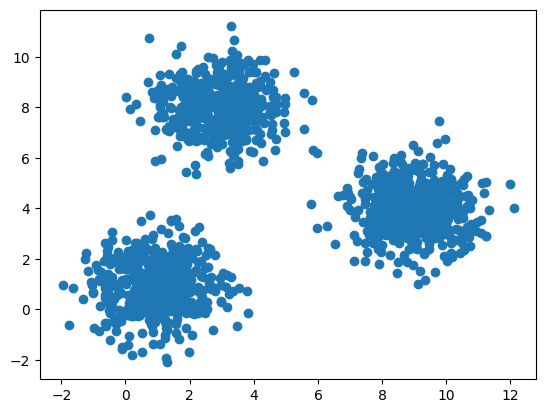

In [ ]:
means = [[1, 1], [9, 4], [3, 8]]
cov = [[1, 0], [0, 1]]
K = 3
N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
plt.scatter(X[:,0], X[:,1])

Running k-means algorithm

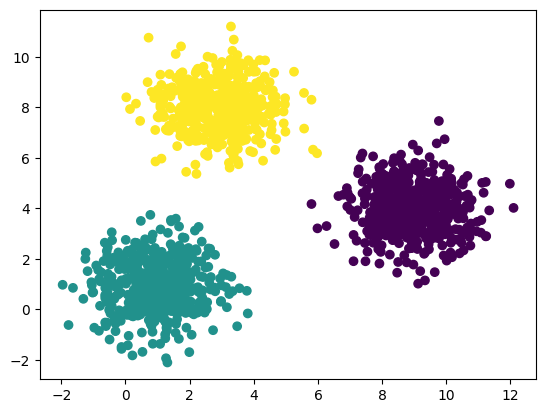

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
ymeans = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ymeans)

#### Hyperparameters:
- Proximity Measures: which metric to represent the closeness of data points, such as cosine, Jaccard, Euclidean
- k: number of clusters

#### Illustration:
The below flowchart showcases the general workflow of k-means algorithm
<center><img src='https://www.researchgate.net/profile/Alhadi-Bustamam/publication/318341309/figure/fig1/AS:514967923159041@1499789328422/Flowchart-of-k-means-clustering-algorithm.png'></center>

##### Source: [Bustamam, A. et al. "Application of K-means Clustering Algorithm in Grouping the DNA Sequences of Hepatitis B Virus (HBV)." *AIP Conference Proceedings*, vol. 1862. no. 1. AIP Publishing LLC, 2017.](https://aip.scitation.org/doi/abs/10.1063/1.4991238)

#### Journal:
Fang and Chiao (2021) showcased the use of k-means clustering algorithm in stock selection. After optimizing k-means clustering algorithm with artificial fish swarm algorithm, the researchers apply the model to group 100 publicly-listed stocks into low-performing and high-perfoming groups.

Reference:

Fang, Z., and Chiao, C. (2021). Research on prediction and recommendation of financial stocks based on K-means clustering algorithm optimization. Retrieved at: https://doi.org/10.3233/JCM-20471

### Elastic Nets

#### **Advantages :**
The elastic net regression offers several benefits in financial applicationsby effectively addressing the common challenges of hi-dimensionality, multicolinearity and the need to balance both feature selection allowing it to build sparse,and robust prediction models that are interpretable in complex financial datasets due to balancing L1 and L2 penalty terms.
* Balances Feature Selection and Coefficient Shrinkage: By combining the strengths of both Lasso and Ridge regression, elastic-net can simultaneously  perform feature selection (Lasso) and handle multicollinearity (Ridge).
* Flexibility through the Mixing Parameter: Tuning the overall regularization strength (λ) and the mixing parameter (α) that controls the balance between L1 and L2 penalties allows flexibility to optimize preformance on specific financial problem.
* Handles High-Dimensional Data: Financial markets are characterized by a large number of potential predictors. Elastic Net can handle datasets where the number of features is much larger than the number of observations (n << p). The L1 penalty performs automatic feature selection, identifying the most relevant variables and setting the coefficients of irrelevant ones to zero.
* Feature Selection and Sparsity improves interpretability: As discussed above The L1 norm (Lasso) component of Elastic Net promotes sparsity in the model identifying a subset of the most influential factors driving asset prices or returns. These sparse models are ofter easier to interpret and less prone ot overfitting which is a significant concern.
* Handles Multicollinearity: The L2 norm (Ridge) component of Elastic Net helps to mitigate the impact of multicollinearity by shrinking the coefficients of correlated variables towards each other. This leads to more stable and reliable model estimates compared to Lasso, which might arbitrarily select one variable from a group of correlated predictors.
* Improved Prediction Accuracy and Robustness: Elastic Net can often achieve better prediction accuracy compared to using either Lasso or Ridge regression alone, especially in complex financial datasets. The regularization helps to prevent overfitting, leading to more robust models that generalize better to unseen data, which is critical for real-world financial applications like trading or risk management.
* Group Selection Effect: Elastic Net exhibits a "grouping effect" where it tends to select groups of highly correlated variables together. This is often desirable in financial markets where related factors might all have some predictive power. For example, if several momentum indicators are correlated, Elastic Net is more likely to select multiple of them (with similar coefficients) rather than just one.  

Sources:<br>
- [Number Analytics: Elastic Net Regression Insights](https://www.google.com/url?q=https%3A%2F%2Fwww.numberanalytics.com%2Fblog%2Felastic-net-regression-insights%23%3A%7E%3Atext%3DBy%2520combining%2520the%2520strengths%2520of%2Cfor%2520feature%2520selection%252C%2520model%2520interpretability%252C)
- [Oxford Research Encyclopedia: Elastic Net Regression](https://oxfordre.com/economics/display/10.1093/acrefore/9780190625979.001.0001/acrefore-9780190625979-e-777?d=%2F10.1093%2Facrefore%2F9780190625979.001.0001%2Facrefore-9780190625979-e-777&p=emailAirmPH7uLsxGo)
- [Number Analytics: Elastic Net Regression Techniques](https://www.numberanalytics.com/blog/elastic-net-regression-techniques#:~:text=By%20combining%20the%20strengths%20of,than%20n%20(the%20number%20of&text=This%20penalty%20has%20the%20effect,zero%2C%20thus%20performing%20feature%20selection.)
- [Carpentries Incubator: Regularization in High-Dimensional Analysis](https://carpentries-incubator.github.io/high-dimensional-analysis-in-python/08-Regularization/index.html#:~:text=In%20contrast%20to%20the%20L2,tends%20to%20lead%20to%20sparse)

#### **Basics :**
Elastic net is a regularization technique that combines both L1(LASSO,Least Absolute Shrinkage and Selection Operator) and L2(ridge) penalties. The two hyper parameters: the overall regularization strength (λ) and the mixing parameter (α) control the balance between L1 and L2 penalties.  

#### **Disadvantages :**
* Increased Complexity Compared to Lasso or Ridge requires tuning of two hyper parameters and obtain optimal combination of these parameters often using cross-validation.
* less sparse than LASSO due to mixing of L2 penalty especially when groups of highly correlated predictors are present.
* Harder to Interpret: When $0 < α < 1$ the combined effect of L1 and L2 penalties on the coefficients can make it less straightforward to understand the exact impact of each predictor compared to a simple Ridge regression (where all coefficients are just shrunk). Its harder to pinpoint which specific variable within the group is truly driving the effect.
* Not Always Superior to Lasso or Ridge: In some situation the added complexity of tuing two parameters may not be justified. e.g.
If the true underlying model is sparse and there is little multicollinearity, Lasso might perform just as well or even better in terms of feature selection and prediction accuracy.
If the true model has many small but non-zero coefficients and there is high multicollinearity, Ridge might be more effective at reducing variance and improving prediction.
* higher computational cost due to added complexity of tuning two hyperparameters especially with cross-validation.
* Linear Model Assumption: Like Lasso and Ridge, Elastic Net is still based on the assumption of a linear relationship between the predictors and the target variable. If this assumption is violated, the model might not perform well, and more complex non-linear models might be needed.

# New Section

#### **Equations :**
Cost function:
$$
\begin{align*}
J(\theta) = MSE(\theta) + \alpha\lambda\sum_{i=1}^n |\theta_i| + \frac{1-\alpha}{2}\lambda\sum_{i=1}^n \theta_i^2
\end{align*}
$$
$\alpha = 0$ $=>$ ridge regression <br>
$\alpha= 1 => $ LASSO regression.

#### **Guide :**
**inputs:** <br>
* feature matrix $X$, <br>
* labels/Target/response Variable $y$, <br>
additional hidden input parameters:
* initial $\lambda$ and $\alpha$, <br>
* $k$ determines the number of folds used in k-fold cross-validation.
* The learning rate parameter (for gradient descent).

**outputs:**<br>
* Trained Model: Coefficients (β) of feature matrix $X$ <br>
* Predictions:
 $\hat{y}$=$X_{new}$​β +intercept( if applicable) <br>
* Model Evaluation Metrics: e.g. Mean Squared Error (MSE)



#### **Hyperparameters :**

Where, $\lambda$ determines the overall strength of regularization, and <br>
$\alpha$, the mixing parameter, balances the weighting of L1 and L2 penalty i.e.feature selection and parameter shrinkage.
Often when tuning the model with e.g. gradient descent the learning rate parameter is also needed.
Tuning of these hyper parameters is performed by cross-validation e.g. k-fold cross-validation.

#### **Journal :**

Segura et al.(2018) applied elastic net penalized regresion to portfolio selection problem and using the S&P 500 real data showed the elastic-net model performed better compared to traditional Markowitz's portfolio due to the uncertainity and covariance. between the expeted returns.
*   Segura, Diego. Penalized Regression Approach to the Portfolio Selection Problem Considering Parameter Uncertainty. 2018.<br>

Acosta et al. (2020) using an elastic-net model incorporated new estimators (the mean-VAR and mean-VaR2) to portfolio selection problems and demonstrated risk reduction and superior performance in all performed etimations.
*   Acosta, Diego, and Revista Cientifica. “Estimating Market Expectations for Portfolio Selection Using Penalized Statistical Models.” Revista Científica, 2020. https://doi.org/10.14483/23448350.15797

#### **Keywords:**

Elestic Net Regression, regularization, Penalized regresson,Penalized models, portfolio optimization, K-fold cross-validation, weights, mixing parameter, l1-ratio


#### **Illustration and Computation :**

In [ ]:
%%capture
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
# Getting historical market data from SPY (ETF) (SPY)
df = yf.download("SPY", start="2000-01-01", end="2022-01-01",auto_adjust=False)

prepare data

In [ ]:
%%capture
df["Ret"] = df["Adj Close"].pct_change()

name = "Ret"
df["Ret10_i"] = (
    df[name].rolling(10).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 10) - 1))
)
df["Ret25_i"] = (
    df[name].rolling(25).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 25) - 1))
)
df["Ret60_i"] = (
    df[name].rolling(60).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 60) - 1))
)
df["Ret120_i"] = (
    df[name].rolling(120).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 120) - 1))
)
df["Ret240_i"] = (
    df[name].rolling(240).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 240) - 1))
)

del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]
del df["Adj Close"]

df = df.dropna()
df.tail(10)
df["Ret25"] = df["Ret25_i"].shift(-25)
df = df.dropna()
df.tail(10)
X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
print(X.shape, y.shape)


split data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(y) * 0.5), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2636, 6) (2635, 6) (2636,) (2635,)


initialize the elastic net model

In [ ]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
# initialize 1
#e_net = ElasticNet(alpha=0.0001, l1_ratio=0.1)
# initialize 2
e_net = ElasticNet(alpha=0.0, l1_ratio=0.0)
e_net.fit(X_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test) ** 2)
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 0.03701473728670045


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.100e+01, tolerance: 1.438e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [ ]:
import pandas as pd

# Convert MultiIndex to a string format
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = ["_".join(map(str, col)) if isinstance(col, tuple) else str(col) for col in X_train.columns]

# Ensure coefficients are 1D
e_net_coeff["Coefficient Estimate"] = e_net.coef_.flatten() if e_net.coef_.ndim > 1 else e_net.coef_

# Display the DataFrame
print(e_net_coeff)

     Columns  Coefficient Estimate
0       Ret_             -0.703022
1   Ret10_i_              0.022072
2   Ret25_i_             -0.076117
3   Ret60_i_              0.030198
4  Ret120_i_              0.297838
5  Ret240_i_             -0.186464


In [ ]:
e_net

ElasticNet(alpha=0.0, l1_ratio=0.0)

In [ ]:
e_net.get_params()

{'alpha': 0.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.0,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

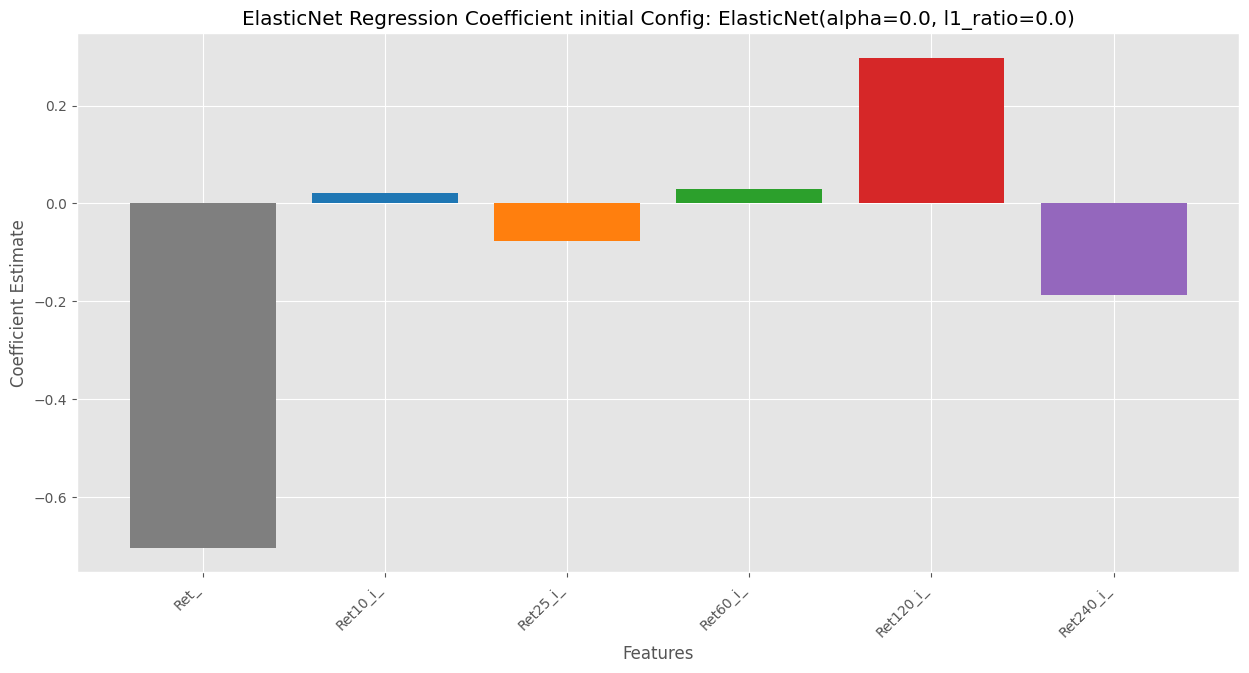

In [ ]:
import matplotlib.pyplot as plt

# Convert MultiIndex to string if necessary
e_net_coeff["Columns"] = e_net_coeff["Columns"].astype(str)

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Define colors
color = [
    "tab:gray",
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:orange",
    "tab:green",
    "tab:blue",
    "tab:olive",
] * (len(e_net_coeff) // 15 + 1)  # Extend color list if needed

# Plot bar chart
ax.bar(
    e_net_coeff["Columns"],
    e_net_coeff["Coefficient Estimate"],
    color=color[: len(e_net_coeff)],  # Ensure color list matches number of bars
)

# Set plot style
plt.style.use("ggplot")
plt.xticks(rotation=45, ha="right")  # Rotate x-labels for better readability
plt.xlabel("Features")
plt.ylabel("Coefficient Estimate")
plt.title("ElasticNet Regression Coefficient initial Config: %s" % e_net)

# Show plot
plt.show()

tuning hyper parameters with grid search
fitting the elastic net


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RepeatedKFold

# Try different scalers if needed
scaler = StandardScaler()  # Alternatives: RobustScaler(), MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define ElasticNet model with increased iterations and warm_start
model = ElasticNet(max_iter=10000, tol=1e-5, warm_start=True)

# Define cross-validation strategy
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define refined grid search parameters
grid = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1.0, 5.0, 10.0],  # Fine-tune alpha
    "l1_ratio": [0, 0.01, 0.05, 0.1, 0.2, 0.4, 0.5]  # Focus on small L1 values
}

# Grid Search with MSE scoring
search = GridSearchCV(model, grid, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

# Perform search on scaled data
results = search.fit(X_train_scaled, y_train)

# Print best results
print("Best MSE: %.6f" % results.best_score_)
print("Best Config: %s" % results.best_params_)

Best MSE: -0.054291
Best Config: {'alpha': 0.1, 'l1_ratio': 0}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.118e+01, tolerance: 1.438e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
results.best_params_

{'alpha': 0.1, 'l1_ratio': 0}

In [ ]:
results.best_score_

np.float64(-0.05429056037705282)

Train the model

In [ ]:
# Train the model
e_net = ElasticNet(alpha=0.001, l1_ratio=0)  # Using the above hyperparameters
e_net.fit(X_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test) ** 2)
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 0.03680822503682739


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.122e+01, tolerance: 1.438e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Coefficients found

In [ ]:
import pandas as pd

# Convert MultiIndex to a string format
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = ["_".join(map(str, col)) if isinstance(col, tuple) else str(col) for col in X_train.columns]

# Ensure coefficients are 1D
e_net_coeff["Coefficient Estimate"] = e_net.coef_.flatten() if e_net.coef_.ndim > 1 else e_net.coef_

# Display the DataFrame
print(e_net_coeff)

     Columns  Coefficient Estimate
0       Ret_             -0.100916
1   Ret10_i_              0.014738
2   Ret25_i_             -0.069215
3   Ret60_i_              0.047538
4  Ret120_i_              0.217630
5  Ret240_i_             -0.110460


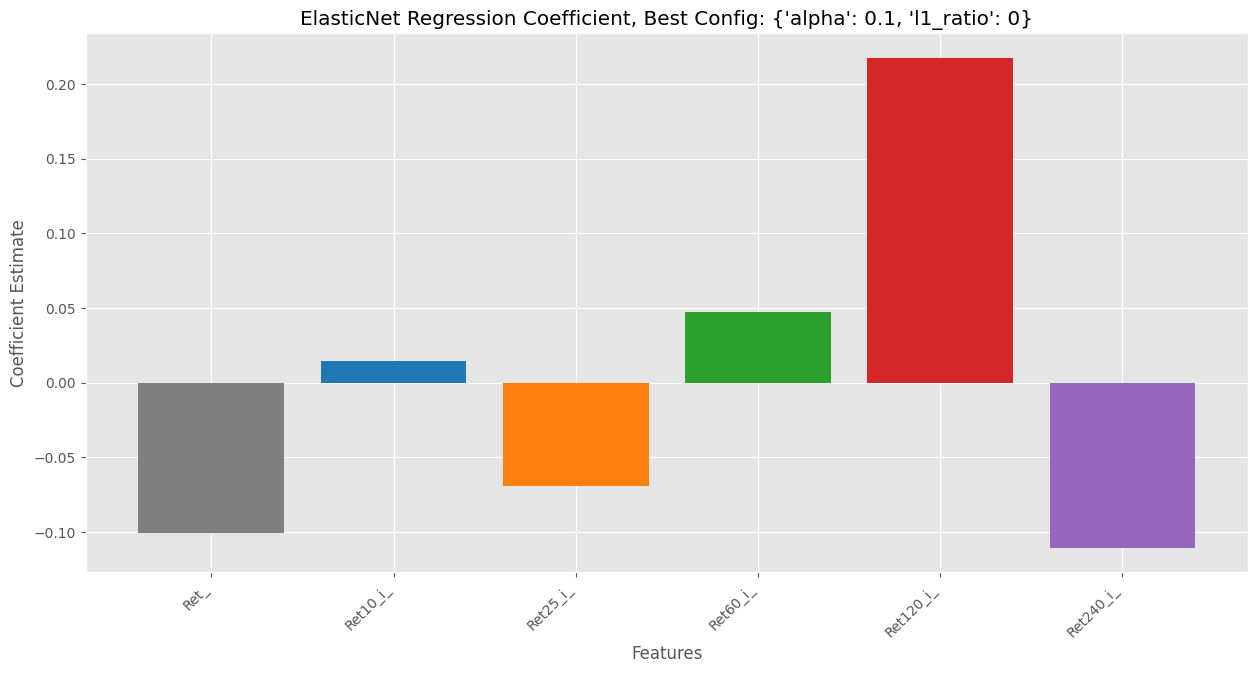

In [ ]:
import matplotlib.pyplot as plt

# Convert MultiIndex to string if necessary
e_net_coeff["Columns"] = e_net_coeff["Columns"].astype(str)

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Define colors
color = [
    "tab:gray",
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:orange",
    "tab:green",
    "tab:blue",
    "tab:olive",
] * (len(e_net_coeff) // 15 + 1)  # Extend color list if needed

# Plot bar chart
ax.bar(
    e_net_coeff["Columns"],
    e_net_coeff["Coefficient Estimate"],
    color=color[: len(e_net_coeff)],  # Ensure color list matches number of bars
)

# Set plot style
plt.style.use("ggplot")
plt.xticks(rotation=45, ha="right")  # Rotate x-labels for better readability
plt.xlabel("Features")
plt.ylabel("Coefficient Estimate")
plt.title("ElasticNet Regression Coefficient, Best Config: %s" % results.best_params_)

# Show plot
plt.show()


# **STEP 3: Technical Section**

#### **Elastic Nets:**
Elastic net at its core has two hyperparameters: <br>
* $\alpha$ the mixing parameter or l1_ratio
* $\lambda$ the regularization penalty strength

Multiple methods are available ot tune these hyper parameters:
* **Cross-validation**: e.g.  k-fold cross-validation, most common method. involves splitting the training data into k-folds. model is trained k-times on each iteration Model is tested on chosen fold after being trained on the remaining k-1 folds using different combinatons of $\lambda$ and $\alpha$. The hyperparameter choice that yields the best average performance on the chosen matric(lowest mean squared error) is selected.
* **Grid search**:
each hyperparamter is specified discrete set fof values spanning a range often with logirithmic spacing for time efficiency. Thus forming a grid of hyperparameter search space. Then after evaluating model's performance on chosen matric for each possible combination in search space using cross-validation and best value set is chosen.  
* **Randomized search**:
* **Model-based optimization (Bayesian optimization)** :<br> probabilistic models to guide the search for the optimal hyperparameters, often requiring fewer evaluations than grid or randomized search.


#### **k-means clustering:**
$k$ parameter of k-means specifies number of clusters. Following tuning methods are used.
* Elbow method: The within-cluster sum of squares (WCSS) or inertia is plotted against $k$ the number of clusters. An "elbow" in the plot, suggests a good trade-off between the number of clusters and the WCSS. This $k$ number of clusters at the elbow is often considered a reasonable choice for n_clusters.
* Silhouette analysis: Calculate the silhouette score for different values of n_clusters. The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters. $k$ that maximizes the average silhouette score is chosen.
* Domain knowledge: Sometimes, prior knowledge about the data can suggest a reasonable number of clusters.

#### **Principal component analysis (PCA):**
PCA explains the variance in data using PCs and loadings. Although it doesn't have hyperparameters to tune in traditional sense. We do have to choose minimum number of PC's that explain the desired variance in the data. there are also hidden hyperparameters that determine the performance of PCA in implemented package e.g.
whiten: A boolean indicating whether to whiten, remove correlation and scale each to unit variance, the principal components.
svd_solver: choice of The Singular Value Decomposition (SVD) solver:  'auto', 'full', 'arpack', 'randomized'. whos choice depends on specific application and data characteristics like sparcity.
The primary task is to determine the number of PC's to use  and the Explained Variance Ratio, Scree Plot and performace on downstream task.
* Explained Variance Ratio captures the proportion of the dataset's variance explaine dby each PC and the choice of components to keep is made by desiding a desired cummulative variance to keep usually 90% or 95%.
* Scree plot: Plots the eigen values (variance explained by each PC) against the PC number. An "elbow" in the plot indicates sharp decrease in variance explained and the number of components before the "elbow" is a good choice for PC's to keep.

# **STEP 4: Marketing Alpha**

In this article, we have showcased the use cases of maching learning models in finance, especially the 3 following algorithms: PCA, k-means clustering, and elastic nets. By applying all 3 algorithms effectively, users can gain a seamless, effective workflow to analyze their financial data and extract impactful insights from them, while also achieving the scaleability and efficiency needed for demanding, complex investigations.

First, regarding unsupervised methods, PCA and k-means clustering provide different options to explore, process, and summarize data. PCA can simplify financial data, which tends to have up to hundreds of variables, into more succinct form. As a result, the algorithm helps to provide scaleability, feature importance, computational performance, while reducing multicollinearity and noises.

Likewise, k-means clustering provides an option to quickly summarize data for exploratory data analysis, segmentation, or even dimension reduction. K-means clustering has the scaleability and computational efficiency to be applied to multiple datasets, and give users an intuitive, understandable, explainable representation of how observations are grouped.

Lastly, as a supervised algorithm, elastic nets provides users a prediction model and causal inference technique to dive deeper and extract advanced insights from financial data. Elastic nets can balance between bias and variance, so it’s also effective for data beyond training sets, helping in out-of-sample prediction and financial forecasting. While elastic nets are a powerful technique, it may incur a significant cost if the dataset is too large. Hence, it can be combined with the above unsupervised technique, PCA and k-means clustering, to achieve the most optimal effects.

As a whole, the 3 algorithms together provide users a seamless way to explore and gain insights from their financial data. Starting with raw, dirty financial data of many rows, users can first use PCA to simplify data into a simpler structure, removing noisy, unnecessary variables to improve computational efficiency. In a way, we are simplifying the dataset vertically, focusing on only the important columns that are worth further investigation. Then, users can apply k-means clustering to get a quick summary of how their observations behave, quickly picking up the high-performing observations that should be explored more. In a sense, users can make their datasets more computationally efficient horizontally, limitting the datasets into valuable rows that have more potential for success. In the last step, users can apply elastic nets model, now in a streamlined dataset that only contains high-potential rows and columns. Elastic nets model can optimize both bias and variance based on user needs, getting insights and prediction power that can be used confidently beyond training data. Besides, compared to other ML prediction models, elastic nets retain interpretability, explainability, while its few hyperparameters can be tuned and tracked easily and efficiently, compared to models with millions of hyperparameters.

Hence, by combining our 3 ML algorithms, users can apply the workflow in a diverse range of financial data, simplifying them both vertically and horizontally, and extract valuable insights from them in an efficient, scaleable, structured manner. Throughout the process, interpretability, efficiency, and scaleability are valued and retained, which makes the process extremely suitable for financial data, even in real-time context, while mainintaing effective communication with non-technical stakeholders.


# **STEP 5: Learn More**


Principal Component Analysis (PCA)

Jolliffe IT, Cadima J. (2016) Principal component analysis: a review and recent developments
- *Source* : Philosophical Transactions A: Mathematical, Physical, and Engineering Sciences
DOI: 10.1098/rsta.2015.0202
- *Summary*: This paper reviews the mathematical foundation and recent advancements in Principal Component Analysis (PCA). Its application in dimensionality reduction, multivariate analysis, and feature extraction, emphasizing eigenvectors and explained variance.


K-Means Clustering

Bustamam, A. et al. (2017) Application of K-means Clustering Algorithm in Grouping the DNA Sequences of Hepatitis B Virus (HBV)
- *Source*: AIP Conference Proceedings, vol. 1862, no. 1, AIP Publishing LLC .
- *Summary*: This study applies the K-means clustering algorithm to classify DNA sequences of Hepatitis B Virus (HBV), demonstrating the method’s efficacy in bioinformatics for pattern recognition and classification.

Fang, Z., and Chiao, C. (2021) Research on prediction and recommendation of financial stocks based on K-means clustering algorithm optimization
- *Source*: Journal of Computational Methods
DOI: 10.3233/JCM-20471
- *Summary*: This paper examines the optimization of the K-means clustering algorithm using the Artificial Fish Swarm Algorithm for stock selection. The model effectively groups 100 publicly listed stocks into low- and high-performing categories, demonstrating its potential for financial market analysis.

Elastic Net Regression

Segura et al. (2018) Penalized Regression Approach to the Portfolio Selection Problem Considering Parameter Uncertainty
- *Summary*: This study applies elastic net regression to the portfolio selection problem. And shows that the model outperforms Markowitz's traditional approach due to its ability to handle uncertainty and covariance in expected returns.

Acosta et al. (2020) Estimating Market Expectations for Portfolio Selection Using Penalized Statistical Models
- *Source*: Revista Científica DOI: 10.14483/23448350.15797
- *Summary*: The authors improve the elastic net model by adding new estimators (mean-VAR and mean-VaR2) in portfolio selection. Their results show a reduction in risk and superior performance across various market conditions.
